In [508]:
#%pip install scipy

In [509]:
#%pip install sklearn

In [510]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [511]:
dataDublin=pd.read_csv('Dublin.csv')
dataDublin.head()

,Unnamed: 0,host_response_time,host_acceptance_rate,property_type,room_type,amenities,host_is_superhost,host_response_rate,host_acceptance_rate.1,host_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,within an hour,93,Private room in bungalow,Private room,"[""Breakfast"", ""Refrigerator"", ""Body soap"", ""Se...",t,96.0,93,2.0,...,4.75,4.92,4.92,4.67,4.82,2.0,0.0,2.0,0.0,2.11
1,1,within an hour,93,Private room in bungalow,Private room,"[""Breakfast"", ""Refrigerator"", ""Self check-in"",...",t,96.0,93,2.0,...,4.76,4.91,4.89,4.65,4.78,2.0,0.0,2.0,0.0,1.90
2,2,within an hour,94,Private room in home,Private room,"[""Breakfast"", ""Refrigerator"", ""Stove"", ""Hair d...",f,100.0,94,3.0,...,4.72,4.84,4.87,4.64,4.71,3.0,0.0,3.0,0.0,2.90
3,3,within a few hours,85,Private room in townhouse,Private room,"[""Breakfast"", ""Blender"", ""Shared gym nearby"", ...",t,87.0,85,2.0,...,4.87,4.94,4.97,4.78,4.85,2.0,0.0,2.0,0.0,3.52
4,4,within a day,78,Entire rental unit,Entire home/apt,"[""Refrigerator"", ""Self check-in"", ""Hair dryer""...",t,75.0,78,4.0,...,4.70,4.83,4.76,4.39,4.54,4.0,4.0,0.0,0.0,0.49


In [512]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(dataDublin)

***Modelo 1 Regresión No Lineal: Tasa de respuesta del anfitrión vs Tasa de aceptación del anfitrión***

In [513]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= dataDublin[['price']]
Var_Dep= dataDublin['reviews_per_month']

In [514]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [515]:
# Función exponencial
def func1(x, a, b, c):
    return a*x**2 + b*x + c # Función cuadrática


In [516]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, dataDublin['price'], dataDublin['reviews_per_month'])

In [517]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 1.43590415e-06, -1.77829568e-03,  2.04391274e+00])

In [518]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, dataDublin['price'], dataDublin['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c # Función cuadrática

In [519]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1.head()

,price
0,1.910839
1,1.912389
2,1.950450
3,1.950450
4,1.721040


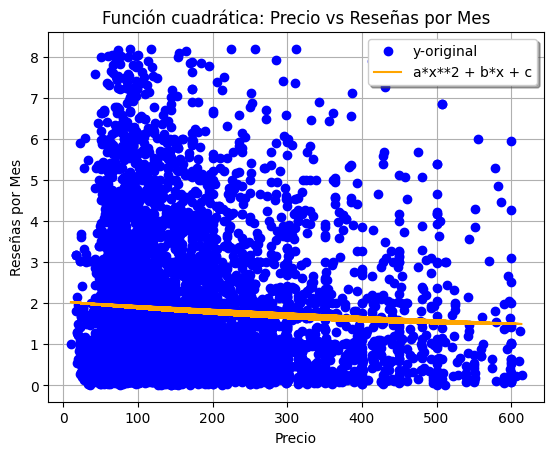

In [520]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Función cuadrática: Precio vs Reseñas por Mes')
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c", color='orange')
plt.xlabel('Precio')
plt.ylabel('Reseñas por Mes')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [521]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.005501260338073077

***Modelo 1  Función Polinomial Inversa: Capacidad de Alojamiento vs Precio del Anfitrión***

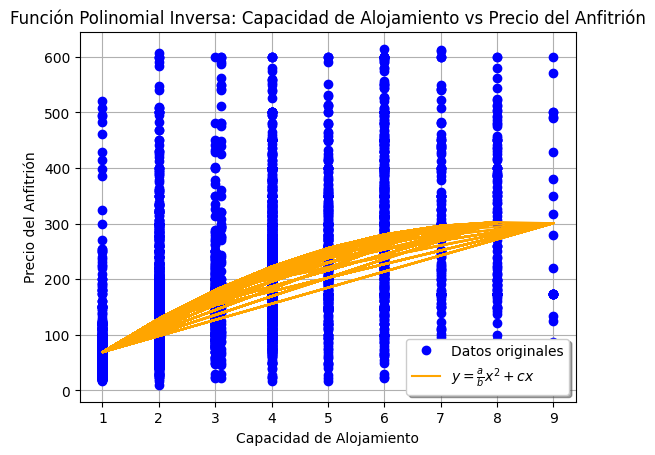

Coeficiente de determinación R²: 0.34919816317152796


In [522]:
# Declaramos las variables dependientes e independientes para la regresión No lineal 
Vars_Indep = dataDublin[['accommodates']].values.flatten()  # Convertir a array unidimensional
Var_Dep = dataDublin['price'].values  # Convertir a array unidimensional

# Definimos la función polinomial inversa
def func1(x, a, b, c):
    return (a / b) * x**2 + c * x  # Función polinomial inversa

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Función Polinomial Inversa: Capacidad de Alojamiento vs Precio del Anfitrión')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="Datos originales")
plt.plot(Vars_Indep, yfit1, label="$y = \\frac{a}{b}x^2 + cx$", color='orange')
plt.xlabel('Capacidad de Alojamiento')
plt.ylabel('Precio del Anfitrión')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)

***Modelo 1  Función cuadrática: Tasa de Respuesta del Anfitrión vs Tasa de Aceptación del Anfitrión***

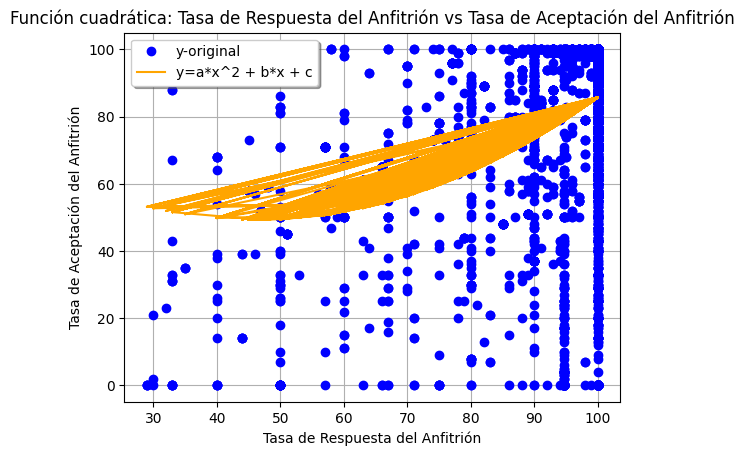

Coeficiente de determinación R²: 0.1374555470021388


In [523]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['host_response_rate']].values.flatten()  # Convertir a array unidimensional
Var_Dep = dataDublin['host_acceptance_rate'].values  # Convertir a array unidimensional

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a * x**2 + b * x + c  # Función cuadrática

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Función cuadrática: Tasa de Respuesta del Anfitrión vs Tasa de Aceptación del Anfitrión')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="y-original")
plt.plot(Vars_Indep, yfit1, label="y=a*x^2 + b*x + c", color='orange')
plt.xlabel('Tasa de Respuesta del Anfitrión')
plt.ylabel('Tasa de Aceptación del Anfitrión')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)



***Modelo 1  Funsion de valor absoluto: Tasa de Respuesta vs Opiniones de los Anfitriones por Mes***

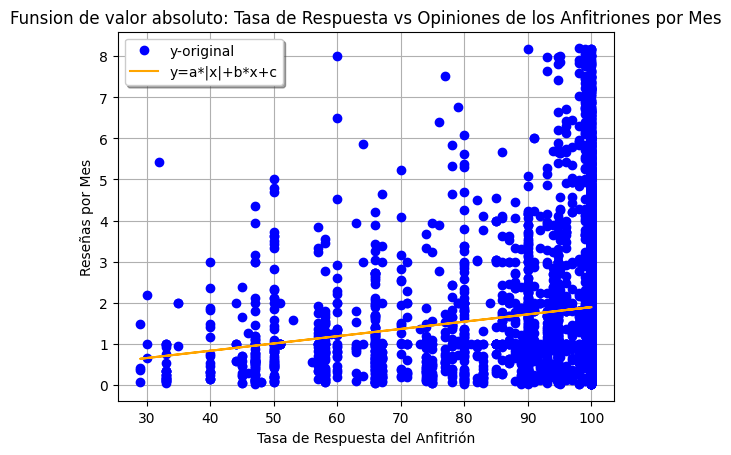

Coeficiente de determinación R²: 0.01817954125928878


In [524]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['host_response_rate']].values.flatten()  # Convertir a array unidimensional
Var_Dep = dataDublin['reviews_per_month'].values  # Convertir a array unidimensional

# Definimos la función de valor absoluto
def func1(x, a, b, c):
    return a * np.abs(x) + b * x + c  # Función de valor absoluto

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Funsion de valor absoluto: Tasa de Respuesta vs Opiniones de los Anfitriones por Mes')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="y-original")
plt.plot(Vars_Indep, yfit1, label="y=a*|x|+b*x+c", color='orange')
plt.xlabel('Tasa de Respuesta del Anfitrión')
plt.ylabel('Reseñas por Mes')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)


***Modelo 1 Regresión Polinomial Inversa: Tasa de Respuesta del Anfitrión vs Listados Totales***

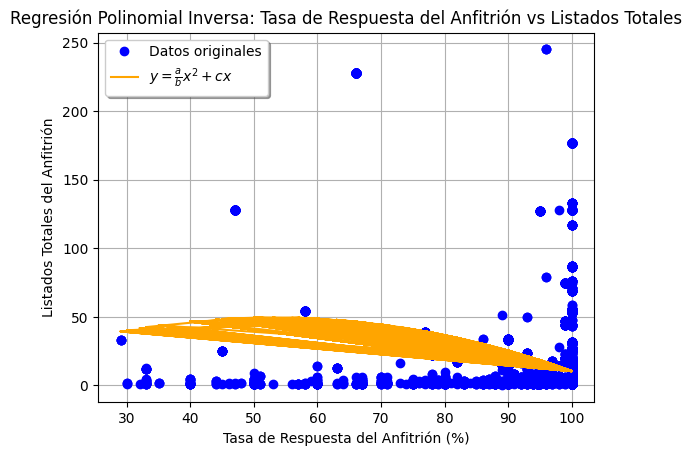

Coeficiente de determinación R²: 0.08097960003134486


In [525]:
# Declaramos las variables dependientes e independientes para la regresión
Vars_Indep = dataDublin[['host_response_rate']].values.flatten()  # Convertir a array unidimensional
Var_Dep = dataDublin['host_total_listings_count'].values  # Convertir a array unidimensional

# Definimos la función polinomial inversa
def func1(x, a, b, c):
    return (a / b) * x**2 + c * x  # Función polinomial inversa

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión
a, b, c = parametros

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Regresión Polinomial Inversa: Tasa de Respuesta del Anfitrión vs Listados Totales')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="Datos originales")
plt.plot(Vars_Indep, yfit1, label="$y = \\frac{a}{b}x^2 + cx$", color='orange')
plt.xlabel('Tasa de Respuesta del Anfitrión (%)')
plt.ylabel('Listados Totales del Anfitrión')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)

***Modelo 1 Función Valor absoluto: Capacidad vs Total de anuncios de anfitriones***

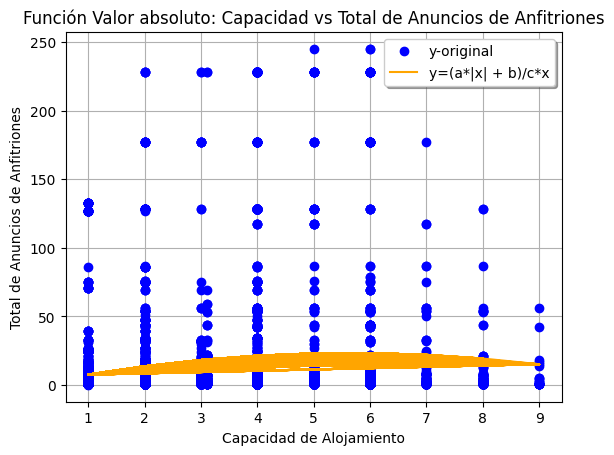

Coeficiente de determinación R²: 0.024635338760323422


In [526]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['accommodates']].values.flatten()  # Convertir a array unidimensional
Var_Dep = dataDublin['host_total_listings_count'].values  # Convertir a array unidimensional

# Definimos la función que incluye el valor absoluto
def func1(x, a, b, c):
    return (a * np.abs(x) + b) / c * x  # Función Valor absoluto

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Función Valor absoluto: Capacidad vs Total de Anuncios de Anfitriones')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="y-original")
plt.plot(Vars_Indep, yfit1, label="y=(a*|x| + b)/c*x", color='orange')
plt.xlabel('Capacidad de Alojamiento')
plt.ylabel('Total de Anuncios de Anfitriones')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)


***Regresión Logistica***

**Creación de Categorias a partir de clases**

**1. Price**

In [527]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dataDublin['price'].max()
Min=dataDublin['price'].min()
Limites= [Min, Max]
Limites

[10.0, 614.0]

In [528]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(9, 615, 3)
intervalos

array([  9., 312., 615.])

In [529]:
#Creamos las categorías 
categorias= ["cheap", "expensive"]

In [530]:
price_numerico=dataDublin["price"]
dataDublin.insert(0,"price_numerico",price_numerico)

In [531]:
#Finalmente creamos las categorías en la columna numérica
dataDublin['price']=pd.cut(x= dataDublin['price'], bins=intervalos, labels= categorias )

In [532]:
dataDublin['price'].head()

0    cheap
1    cheap
2    cheap
3    cheap
4    cheap
Name: price, dtype: category
Categories (2, object): ['cheap' < 'expensive']

In [533]:
dataDublin["price"].isnull().sum()

0

In [534]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= dataDublin[['accommodates']]
Var_Dep= dataDublin['price']

#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="cheap")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="expensive")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="cheap")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="expensive")
print('Sensibilidad del modelo:')
print(sensibilidad)

Matriz de Confusión:
[[1514   30]
 [ 175   23]]
Precisión del modelo:
0.896388395500296
Precisión del modelo:
0.4339622641509434
Exactitud del modelo:
0.8823191733639495
Sensibilidad del modelo:
0.9805699481865285
Sensibilidad del modelo:
0.11616161616161616


***2. Host Total Listings Count***

In [535]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dataDublin['host_total_listings_count'].max()
Min=dataDublin['host_total_listings_count'].min()
Limites= [Min, Max]
Limites

[0.0, 245.0]

In [536]:
dataDublin["host_total_listings_count"].unique()

array([  2.,   4.,   5.,   1.,   8.,   3.,   6.,  11.,   7.,  56.,  27.,
        16.,  24.,  22., 177.,  17., 128.,  10.,   9.,  12.,  30.,  19.,
       228.,  13.,  54.,  53.,  39.,  14.,  18.,  69., 245.,  44.,  32.,
       127., 117.,  15.,  86.,  51.,  47.,  25.,  20.,  42.,  50.,  34.,
        43.,  23.,  75.,  79.,  31.,  28.,  87.,  33.,  29.,  59.,   0.,
       133.,  21.,  71.,  48.,  76.,  26.])

In [537]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(-1, 246, 3)
intervalos

array([ -1. , 122.5, 246. ])

In [538]:
#Creamos las categorías 
categorias= ["Alto", "Bajo"]

In [539]:
host_total_listings_count_numeric=dataDublin['host_total_listings_count']
dataDublin.insert(0,"host_total_listings_count_numeric", host_total_listings_count_numeric)

In [540]:
#Finalmente creamos las categorías en la columna numérica
dataDublin['host_total_listings_count']=pd.cut(x= dataDublin['host_total_listings_count'], bins=intervalos, labels= categorias )

In [541]:
dataDublin['host_total_listings_count'].head()

0    Alto
1    Alto
2    Alto
3    Alto
4    Alto
Name: host_total_listings_count, dtype: category
Categories (2, object): ['Alto' < 'Bajo']

In [542]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['accommodates']]
Var_Dep = dataDublin['host_total_listings_count']
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [543]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [544]:
#Se escalan todos los datos
escalar = StandardScaler()

In [545]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [546]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [547]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [548]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['Alto', 'Alto', 'Alto', ..., 'Alto', 'Alto', 'Alto'], dtype=object)

In [549]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[1652    0]
 [  90    0]]


In [550]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.9483352468427095
Precisión del modelo:
0.0
Exactitud del modelo:
0.9483352468427095
Sensibilidad del modelo:
1.0
Sensibilidad del modelo:
0.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***3. Reviews Per Month***

In [551]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dataDublin['reviews_per_month'].max()
Min=dataDublin['reviews_per_month'].min()
Limites= [Min, Max]
Limites

[0.01, 8.19]

In [552]:
dataDublin["reviews_per_month"].unique()

array([2.11, 1.9 , 2.9 , 3.52, 0.49, 0.54, 3.43, 0.32, 3.12, 0.5 , 0.99,
       0.25, 1.2 , 4.26, 1.82, 3.93, 1.3 , 4.07, 2.58, 3.53, 4.59, 1.92,
       0.67, 0.57, 4.41, 1.75, 0.22, 0.75, 1.63, 0.03, 0.62, 0.28, 0.08,
       2.41, 1.12, 1.  , 2.73, 0.09, 0.72, 2.01, 3.98, 0.69, 0.14, 0.11,
       0.61, 1.52, 3.59, 0.06, 0.51, 0.6 , 0.18, 1.09, 4.58, 1.27, 5.98,
       2.87, 4.22, 0.73, 2.78, 2.02, 2.18, 2.  , 0.26, 1.94, 1.26, 0.35,
       0.2 , 3.92, 0.15, 0.68, 1.96, 0.13, 0.19, 0.07, 1.48, 2.07, 0.96,
       1.57, 0.29, 1.38, 0.76, 0.59, 1.24, 2.52, 1.59, 1.99, 1.49, 2.47,
       2.09, 5.99, 2.83, 1.71, 0.63, 0.8 , 1.15, 1.84, 3.1 , 3.67, 1.89,
       2.28, 1.51, 0.16, 0.24, 2.21, 2.32, 1.81, 1.11, 1.1 , 1.06, 1.58,
       1.45, 0.64, 1.34, 0.1 , 0.36, 0.42, 1.77, 1.17, 0.37, 0.02, 2.05,
       0.04, 5.2 , 0.81, 0.7 , 1.19, 0.41, 2.55, 2.23, 2.16, 2.25, 0.84,
       1.02, 2.53, 3.73, 1.14, 3.89, 7.23, 2.43, 0.65, 0.85, 3.  , 1.69,
       2.22, 2.82, 1.53, 0.31, 0.94, 0.23, 0.3 , 1.

In [553]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(-0.2, 8.21, 3)
intervalos

array([-0.2  ,  4.005,  8.21 ])

In [554]:
#Creamos las categorías 
categorias= ["Alto", "Bajo"]

In [555]:
reviews_per_month_numeric=dataDublin['reviews_per_month']
dataDublin.insert(0,"reviews_per_month_numeric", reviews_per_month_numeric)

In [556]:
#Finalmente creamos las categorías en la columna numérica
dataDublin['reviews_per_month']=pd.cut(x= dataDublin['reviews_per_month'], bins=intervalos, labels= categorias )

In [557]:
dataDublin['reviews_per_month'].head()

0    Alto
1    Alto
2    Alto
3    Alto
4    Alto
Name: reviews_per_month, dtype: category
Categories (2, object): ['Alto' < 'Bajo']

In [558]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['host_response_rate']]
Var_Dep = dataDublin['reviews_per_month']
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [559]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)


In [560]:
#Se escalan todos los datos
escalar = StandardScaler()


In [561]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [562]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [563]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [564]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['Alto', 'Alto', 'Alto', ..., 'Alto', 'Alto', 'Alto'], dtype=object)

In [565]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[1533    0]
 [ 209    0]]


In [566]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.8800229621125144
Precisión del modelo:
0.0
Exactitud del modelo:
0.8800229621125144
Sensibilidad del modelo:
1.0
Sensibilidad del modelo:
0.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***4. Maximum Nights***

In [567]:
unico = np.unique(dataDublin["maximum_nights"])
unico

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   40,   41,   42,   45,   48,   50,   51,
         52,   55,   56,   58,   60,   61,   62,   63,   65,   70,   73,
         74,   75,   77,   80,   84,   85,   89,   90,   91,   92,   94,
         95,   98,   99,  100,  104,  110,  112,  113,  120,  122,  124,
        125,  128,  130,  139,  140,  150,  152,  153,  155,  160,  165,
        179,  180,  182,  183,  185,  190,  200,  222,  224,  240,  250,
        270,  280,  300,  333,  350,  360,  365,  368,  395,  500,  600,
        700,  720,  729,  730,  999, 1000, 1001, 1124, 1125], dtype=int64)

In [568]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dataDublin['maximum_nights'].max()
Min=dataDublin['maximum_nights'].min()
Limites= [Min, Max]
Limites

[1, 1125]

In [569]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(0,1126, 3)
intervalos

array([   0.,  563., 1126.])

In [570]:

#Creamos las categorías 
categorias= ["Alto", "Bajo"]

host_total_listings_count_numeric=dataDublin['maximum_nights']
dataDublin.insert(0,"maximum_nights_numeric", host_total_listings_count_numeric)

#Finalmente creamos las categorías en la columna numérica
dataDublin['maximum_nights']=pd.cut(x= dataDublin['maximum_nights'], bins=intervalos, labels= categorias )

dataDublin['maximum_nights'].head()

dataDublin["maximum_nights"].isnull().sum()

0

In [571]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['minimum_nights']]
Var_Dep = dataDublin['maximum_nights']

#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad)

Matriz de Confusión:
[[1416    0]
 [ 326    0]]
Precisión del modelo:
0.8128587830080367
Precisión del modelo:
0.0
Exactitud del modelo:
0.8128587830080367
Sensibilidad del modelo:
1.0
Sensibilidad del modelo:
0.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**5. Bathrooms**

In [572]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dataDublin['bathrooms'].max()
Min=dataDublin['bathrooms'].min()
Limites= [Min, Max]
Limites

#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(-1, 4, 3)
intervalos

#Creamos las categorías 
categorias= ["Alto", "Bajo"]

host_total_listings_count_numeric=dataDublin['bathrooms']
dataDublin.insert(0,"bathrooms_numeric", host_total_listings_count_numeric)

#Finalmente creamos las categorías en la columna numérica
dataDublin['bathrooms']=pd.cut(x= dataDublin['bathrooms'], bins=intervalos, labels= categorias )

dataDublin['bathrooms'].head()

dataDublin["bathrooms"].isnull().sum()

0

In [573]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['bedrooms']]
Var_Dep = dataDublin['bathrooms']

#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad)

Matriz de Confusión:
[[1267   88]
 [ 245  142]]
Precisión del modelo:
0.8379629629629629
Precisión del modelo:
0.6173913043478261
Exactitud del modelo:
0.8088404133180253
Sensibilidad del modelo:
0.9350553505535055
Sensibilidad del modelo:
0.3669250645994832


**Categorica**

***6. Property Type***

In [574]:
unico = np.unique(dataDublin["property_type"])
unico

array(['Barn', 'Camper/RV', 'Castle', 'Dome', 'Entire bungalow',
       'Entire cabin', 'Entire chalet', 'Entire condo', 'Entire cottage',
       'Entire guest suite', 'Entire guesthouse', 'Entire home',
       'Entire home/apt', 'Entire loft', 'Entire place',
       'Entire rental unit', 'Entire serviced apartment',
       'Entire townhouse', 'Entire vacation home', 'Entire villa',
       'Farm stay', 'Houseboat', 'Hut', 'Private room',
       'Private room in barn', 'Private room in bed and breakfast',
       'Private room in bungalow', 'Private room in casa particular',
       'Private room in chalet', 'Private room in condo',
       'Private room in cottage', 'Private room in guest suite',
       'Private room in guesthouse', 'Private room in home',
       'Private room in hostel', 'Private room in loft',
       'Private room in rental unit',
       'Private room in serviced apartment', 'Private room in tiny home',
       'Private room in townhouse', 'Private room in vacation home'

In [575]:
dataDublin["property_type"]=dataDublin["property_type"].replace(['Barn', 'Camper/RV', 'Castle', 'Dome', 'Entire bungalow',
       'Entire cabin', 'Entire chalet', 'Entire condo', 'Entire cottage',
       'Entire guest suite', 'Entire guesthouse', 'Entire home',
       'Entire home/apt', 'Entire loft', 'Entire place',
       'Entire rental unit', 'Entire serviced apartment',
       'Entire townhouse', 'Entire vacation home', 'Entire villa',
       'Farm stay', 'Houseboat', 'Hut', 'Private room',
       'Private room in barn', 'Private room in bed and breakfast',
       'Private room in bungalow', 'Private room in casa particular',
       'Private room in chalet', 'Private room in condo'],"grupo1")

In [576]:
dataDublin["property_type"]=dataDublin["property_type"].replace(['Private room in cottage', 'Private room in guest suite',
       'Private room in guesthouse', 'Private room in home',
       'Private room in hostel', 'Private room in loft',
       'Private room in rental unit',
       'Private room in serviced apartment', 'Private room in tiny home',
       'Private room in townhouse', 'Private room in vacation home',
       'Private room in villa', 'Room in aparthotel',
       'Room in bed and breakfast', 'Room in boutique hotel',
       'Room in hostel', 'Room in hotel',
       'Shared room in bed and breakfast', 'Shared room in bungalow',
       'Shared room in condo', 'Shared room in guest suite',
       'Shared room in home', 'Shared room in hostel',
       'Shared room in rental unit', 'Shared room in townhouse',
       'Shepherd’s hut', 'Tiny home'],"grupo2")

In [577]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['host_response_rate']]
Var_Dep = dataDublin['property_type']
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [578]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)


In [579]:
#Se escalan todos los datos
escalar = StandardScaler()


In [580]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [581]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [582]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [583]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['grupo1', 'grupo1', 'grupo1', ..., 'grupo1', 'grupo1', 'grupo1'],
      dtype=object)

In [584]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[1042    0]
 [ 700    0]]


In [585]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="grupo1")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="grupo2")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="grupo1")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="grupo2")
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.5981630309988519
Precisión del modelo:
0.0
Exactitud del modelo:
0.5981630309988519
Sensibilidad del modelo:
1.0
Sensibilidad del modelo:
0.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***7. Host Response Time***

In [586]:
unico = np.unique(dataDublin["host_response_time"])
unico 

array(['a few days or more', 'within a day', 'within a few hours',
       'within an hour'], dtype=object)

In [587]:
dataDublin["host_response_time"]=dataDublin["host_response_time"].replace(['a few days or more', 'within a day'],"grupo1")

In [588]:
dataDublin["host_response_time"]=dataDublin["host_response_time"].replace(['within a few hours',
       'within an hour'],"grupo2")

In [589]:
dataDublin.columns

Index(['bathrooms_numeric', 'maximum_nights_numeric',
       'reviews_per_month_numeric', 'host_total_listings_count_numeric',
       'price_numerico', 'Unnamed: 0', 'host_response_time',
       'host_acceptance_rate', 'property_type', 'room_type', 'amenities',
       'host_is_superhost', 'host_response_rate', 'host_acceptance_rate.1',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'revi

In [590]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['price_numerico']]
Var_Dep = dataDublin['host_response_time']
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [591]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [592]:
#Se escalan todos los datos
escalar = StandardScaler()


In [593]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [594]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [595]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [596]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['grupo2', 'grupo2', 'grupo2', ..., 'grupo2', 'grupo2', 'grupo2'],
      dtype=object)

In [597]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0  323]
 [   0 1419]]


In [598]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="grupo1")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="grupo2")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="grupo1")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="grupo2")
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.0
Precisión del modelo:
0.8145809414466131
Exactitud del modelo:
0.8145809414466131
Sensibilidad del modelo:
0.0
Sensibilidad del modelo:
1.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***8. Host is Superhost***

In [599]:
unico = np.unique(dataDublin["host_is_superhost"])
unico 

array(['f', 't'], dtype=object)

In [600]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['review_scores_communication']]
Var_Dep = dataDublin['host_is_superhost']
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [601]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [602]:
#Se escalan todos los datos
escalar = StandardScaler()

In [603]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [604]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [605]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [606]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['f', 'f', 'f', ..., 'f', 'f', 'f'], dtype=object)

In [607]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[1283    0]
 [ 459    0]]


In [608]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="f")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="t")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.7365097588978186
Precisión del modelo:
0.0
Exactitud del modelo:
0.7365097588978186
Sensibilidad del modelo:
1.0
Sensibilidad del modelo:
0.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [609]:
dataDublin.columns

Index(['bathrooms_numeric', 'maximum_nights_numeric',
       'reviews_per_month_numeric', 'host_total_listings_count_numeric',
       'price_numerico', 'Unnamed: 0', 'host_response_time',
       'host_acceptance_rate', 'property_type', 'room_type', 'amenities',
       'host_is_superhost', 'host_response_rate', 'host_acceptance_rate.1',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'revi

**9. Room_type**

In [610]:
unico = np.unique(dataDublin["room_type"])
unico

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

In [611]:
dataDublin["room_type"]=dataDublin["room_type"].replace(['Hotel room', 'Entire home/apt'],"grupo1")
dataDublin["room_type"]=dataDublin["room_type"].replace(['Shared room',"Private room"],"grupo2")

In [612]:
unico = np.unique(dataDublin["room_type"])
unico

array(['grupo1', 'grupo2'], dtype=object)

In [613]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['price_numerico']]
Var_Dep = dataDublin['room_type']

#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="grupo1")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="grupo2")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="grupo1")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="grupo2")
print('Sensibilidad del modelo:')
print(sensibilidad)

Matriz de Confusión:
[[764 227]
 [138 613]]
Precisión del modelo:
0.8470066518847007
Precisión del modelo:
0.7297619047619047
Exactitud del modelo:
0.7904707233065442
Sensibilidad del modelo:
0.7709384460141272
Sensibilidad del modelo:
0.8162450066577897


**10. Review Scores Location**

In [614]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dataDublin['review_scores_location'].max()
Min=dataDublin['review_scores_location'].min()
Limites= [Min, Max]
Limites

[3.71, 5.0]

In [615]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(3.60, 5.1, 3)
intervalos

array([3.6 , 4.35, 5.1 ])

In [616]:
#Creamos las categorías 
categorias= ["Alto", "Bajo"]

host_total_listings_count_numeric=dataDublin['review_scores_location']
dataDublin.insert(0,"review_scores_location_numeric", host_total_listings_count_numeric)

#Finalmente creamos las categorías en la columna numérica
dataDublin['review_scores_location']=pd.cut(x= dataDublin['review_scores_location'], bins=intervalos, labels= categorias )

dataDublin['review_scores_location'].head()

dataDublin["review_scores_location"].isnull().sum()

0

In [617]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = dataDublin[['availability_30']]
Var_Dep = dataDublin['review_scores_location']

#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Precisión del modelo:')
print(precision)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Alto")
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad)

Matriz de Confusión:
[[   0  141]
 [   0 1601]]
Precisión del modelo:
0.0
Precisión del modelo:
0.9190585533869116
Exactitud del modelo:
0.9190585533869116
Sensibilidad del modelo:
0.0
Sensibilidad del modelo:
1.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
